# The Calculation of Mean and Median Values of Tropical Precipitation 

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Calculation of mean of tropical precipitation   for ICON data](#2-calculation-of-mean-of-tropical-precipitation-for-icon-data)

3. [Calculation of median of tropical precipitation for IFS data](#3-calculation-of-median-of-tropical-precipitation-for-ifs-data)

4. [Plotting Function of Mean and Median values of Tropical Precipitation](#4-plotting-function-of-mean-and-median-values-of-tropical-precipitation)

   4.1 [Along the time coordinate](#41-along-the-time-coordinate)

   4.2 [Comparison of Mean and Median values](#42-comparison-of-mean-and-median-values)

   4.3 [Along longitude](#43-along-longitude)

   4.4 [Along latitude](#44-along-latitude)

   4.5 [Comparison of Mean Precipitation value for different tropical bands](#45-comparison-of-mean-precipitation-value-for-different-tropical-bands)

[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../')
from tropical_rainfall_class import TR_PR_Diagnostic as TR_PR_Diag

FDB5 binary library not present on system, disabling FDB support.


In [2]:
from tropical_rainfall_func import time_interpreter

#### ICON data

In [2]:
reader = Reader(model="ICON", exp="ngc2009", source="lra-r100-monthly")
icon = reader.retrieve()

#### IFS data

In [3]:
reader = Reader(model="IFS", exp="tco2559-ng5", source="lra-r100-monthly")
ifs = reader.retrieve()
ifs = ifs.isel(time=slice(1, -1))

In [4]:
diag = TR_PR_Diag()

## 2. Calculation of mean of tropical precipitation for ICON data


#### The `mean_along_coordinate` function calculates the mean value of a model variable (by default of precipitation) along any coordinate or global mean.

#### The function has an argument `coordinate`, which can be 

* `time` (by default)

* `lat` or `latitude`

* `lon` or `longitude`

#### The function calculates the global mean value if the user sets the `glob = True`. Below you can find examples of the function usage. 




##### Along time coordinate

In [ ]:
diag.mean_along_coordinate(icon)

##### Along latitude coordinate

In [ ]:
diag.mean_along_coordinate(icon, coord='lat')

##### Along longitude coordinate

In [ ]:
diag.mean_along_coordinate(icon, coord='lon')

##### Global Mean value 

In [14]:
diag.median_along_coordinate(icon, glob=True).values

array(3.43452381e-08)

## 3. Calculation of median of tropical precipitation for IFS data

#### The `median_along_coordinate` function calculates the median value of a model variable (by default of precipitation) along any coordinate or global median.

#### The function has an argument `coordinate`, which can be 

* `time` (by default)

* `lat` or `latitude`

* `lon` or `longitude`

#### The function calculates the global median value if the user sets the `glob = True`. Below you can find examples of the function usage. 

##### Along time coordinate

In [ ]:
diag.median_along_coordinate(ifs)

##### Along latitude coordinate

In [ ]:
diag.median_along_coordinate(ifs, coord='lat')

##### Along longitude coordinate

In [ ]:
diag.median_along_coordinate(ifs, coord='lon')

## 4. Plotting Function of Mean and Median values of Tropical Precipitation

The diagnostic provides a simple plotting function for mean and median values of precipitation. For example, the function produces the following plot.

In [16]:
time_interpreter(ifs), time_interpreter(icon)

('M', 'M')

### 4.1 Along the time coordinate

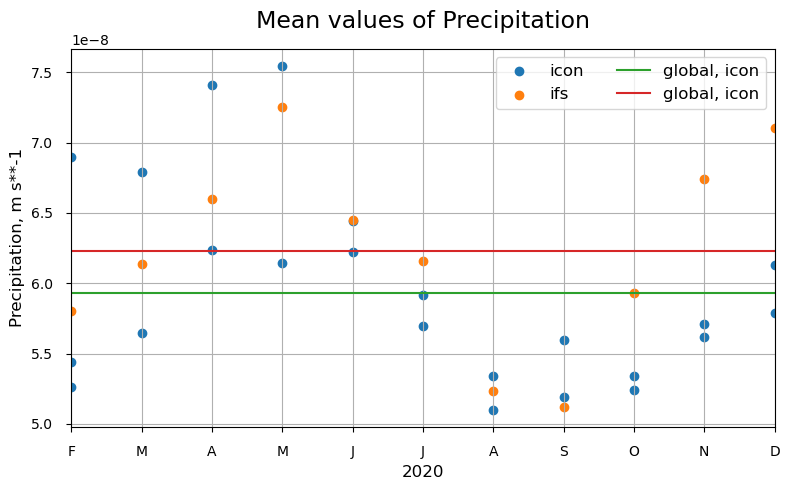

In [22]:
add = diag.mean_and_median_plot(icon,                      legend='icon')
add = diag.mean_and_median_plot(ifs,  fig=add,             legend='ifs')
add = diag.mean_and_median_plot(icon, fig=add, glob=True,  legend='global, icon', color='tab:green')
add = diag.mean_and_median_plot(ifs,  fig=add, glob=True,  legend='global, icon', color='tab:red')

### 4.2 Comparison of Mean and Median values 

{<Axes: title={'center': 'Mean values of Precipitation'}, xlabel='2020 - 2022', ylabel='Precipitation, m s**-1'>,
 <Figure size 800x500 with 1 Axes>}

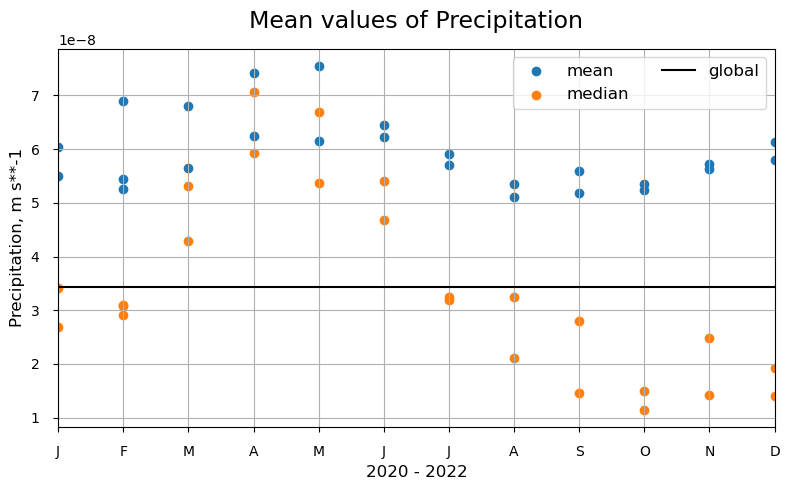

In [23]:
add = diag.mean_and_median_plot(icon,          legend='mean')
add = diag.mean_and_median_plot(icon, fig=add, legend='median', get_median=True)
diag.mean_and_median_plot(icon,       fig=add, legend='global', get_median=True, glob=True, color='k')

### 4.3 Along longitude

2023-07-02 22:54:00 :: create_folder :: WARNING  -> Folder ./ already exists


{<Axes: title={'center': 'Mean values of Precipitation'}, xlabel='Longitude', ylabel='Precipitation, kg m**-2 s**-1'>,
 <Figure size 720x450 with 1 Axes>}

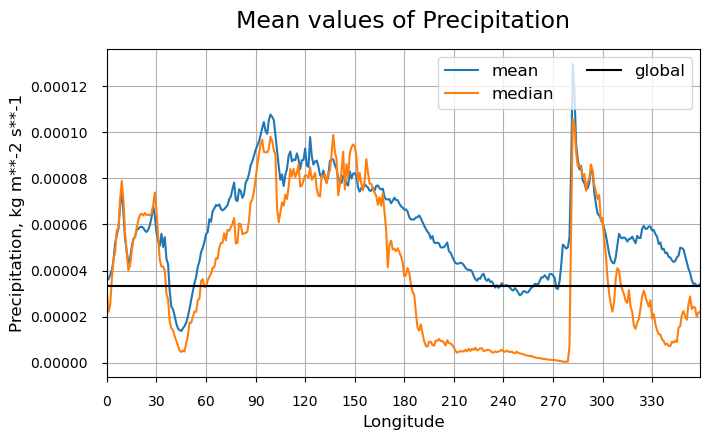

In [6]:
add = diag.mean_and_median_plot(icon,          coord='lon', legend='mean', figsize=0.9)
add = diag.mean_and_median_plot(icon, fig=add, coord='lon', legend='median', get_median=True)
diag.mean_and_median_plot(icon,       fig=add, coord='lon', legend='global', get_median=True, glob=True, color='k', 
                          path_to_figure='./mean_lon.png')

### 4.4 Along latitude

2023-07-02 23:08:26 :: create_folder :: WARNING  -> Folder ./ already exists


{<Axes: title={'center': 'Mean values of Precipitation'}, xlabel='Latitude', ylabel='Precipitation, kg m**-2 s**-1'>,
 <Figure size 640x400 with 1 Axes>}

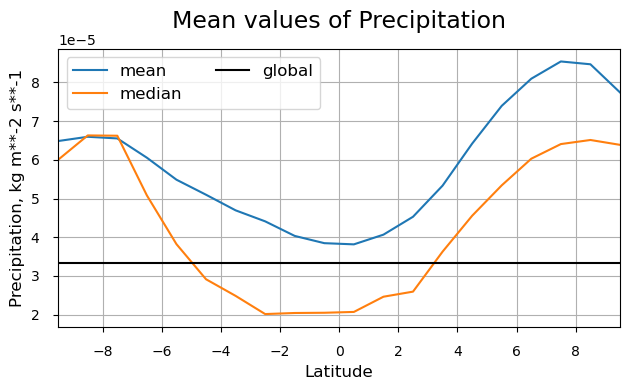

In [9]:
add = diag.mean_and_median_plot(icon,          coord='lat', legend='mean',   figsize=0.8)
add = diag.mean_and_median_plot(icon, fig=add, coord='lat', legend='median', get_median=True)
diag.mean_and_median_plot(icon,       fig=add, coord='lat', legend='global', get_median=True, glob=True, color='k',
                          path_to_figure='./mean_lat.png', loc='upper left')

### 4.5 Comparison of Mean Precipitation value for different tropical bands

{<Axes: title={'center': 'Mean values of Precipitation'}, xlabel='Longitude', ylabel='Precipitation, m s**-1'>,
 <Figure size 800x500 with 1 Axes>}

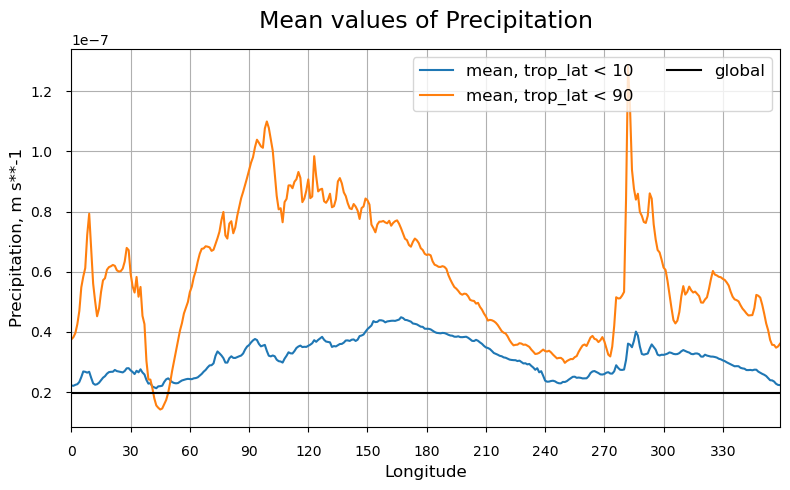

In [30]:
add = diag.mean_and_median_plot(icon,          coord='lon',  legend='mean, trop_lat < 10', trop_lat=10)
add = diag.mean_and_median_plot(icon, fig=add, coord='lon',  legend='mean, trop_lat < 90', trop_lat=90)
diag.mean_and_median_plot(icon,       fig=add, coord='lon',  legend='global', get_median=True, glob=True, color='k')

#

##### The end